In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Practice DataSet from Keggle\\Kaggle\\Pistachio\\Pistachio_Image_Dataset'

In [9]:
test_data_dir='C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Practice DataSet from Keggle\\Kaggle\\Pistachio\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset\\test'
train_data_dir = 'C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Practice DataSet from Keggle\\Kaggle\\Pistachio\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset\\train'

In [8]:
os.listdir(test_data_dir)

['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [10]:
os.listdir(train_data_dir)

['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [29]:
os.listdir(train_data_dir +'\\Kirmizi_Pistachio')[0]

'kirmizi (1).jpg'

In [30]:
img_arr=plt.imread(train_data_dir +'\\Kirmizi_Pistachio'+'\\kirmizi (1).jpg')

In [31]:
img_arr.shape

(600, 600, 3)

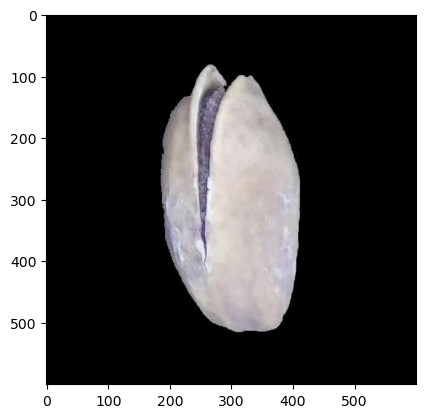

In [32]:
plt.imshow(plt.imread(train_data_dir +'\\Kirmizi_Pistachio'+'\\kirmizi (1).jpg'))

In [24]:
os.listdir(train_data_dir +'\\Siirt_Pistachio')[0]

'siirt (1).jpg'

In [27]:
plt.imread(train_data_dir +'\\Siirt_Pistachio'+'\\siirt (1).jpg').shape

(600, 600, 3)

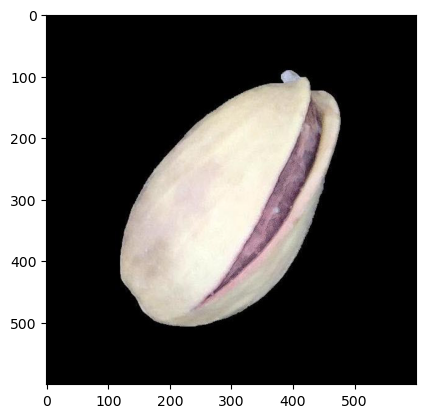

In [33]:
plt.imshow(plt.imread(train_data_dir +'\\Siirt_Pistachio'+'\\siirt (1).jpg'))

In [38]:
dim1=[]
dim2=[]
for img_filename in os.listdir(test_data_dir +'\\Siirt_Pistachio'):
    img = plt.imread(test_data_dir +'\\Siirt_Pistachio\\' + img_filename)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [40]:
np.mean(dim1)

600.0

In [41]:
np.mean(dim2)

600.0

In [42]:
img_shape = (600,600,3)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
img_gen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [46]:
img_gen.flow_from_directory(train_data_dir)

Found 1789 images belonging to 2 classes.


In [47]:
img_gen.flow_from_directory(test_data_dir)

Found 359 images belonging to 2 classes.


In [48]:
### Model Creation

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , MaxPooling2D ,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
model = Sequential()

In [80]:
model.add(Conv2D(filters=64 , kernel_size=(6,6),input_shape=img_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(filters=64 , kernel_size=(6,6),input_shape=img_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(filters=32 , kernel_size=(6,6),input_shape=img_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [81]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [82]:
early = EarlyStopping(monitor='val_loss',patience=2)

In [83]:
batch_size = 16

In [84]:
img_shape[:2]

(600, 600)

In [85]:
train_img_gen = img_gen.flow_from_directory(train_data_dir,
                                           target_size=img_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 1789 images belonging to 2 classes.


In [86]:
test_img_gen = img_gen.flow_from_directory(test_data_dir,
                                           target_size=img_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary',
                                          shuffle=False)

Found 359 images belonging to 2 classes.


In [87]:
train_img_gen.class_indices

{'Kirmizi_Pistachio': 0, 'Siirt_Pistachio': 1}

In [88]:
model.fit(train_img_gen,epochs=20 , validation_data=test_img_gen , callbacks=[early])

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 452s 4s/step - accuracy: 0.6065 - loss: 4.1748 - val_accuracy: 0.7354 - val_loss: 0.5391
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 461s 4s/step - accuracy: 0.7326 - loss: 0.5520 - val_accuracy: 0.7465 - val_loss: 0.4893
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.7294 - loss: 0.5595 - val_accuracy: 0.7688 - val_loss: 0.4840
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 477s 4s/step - accuracy: 0.7470 - loss: 0.5407 - val_accuracy: 0.7604 - val_loss: 0.5175
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - accuracy: 0.7487 - loss: 0.4994 - val_accuracy: 0.7521 - val_loss: 0.5172


In [89]:
metrics = pd.DataFrame(model.history.history)

In [90]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.648966,1.498867,0.735376,0.539079
1,0.724427,0.560707,0.746518,0.489327
2,0.726663,0.558574,0.768802,0.484032
3,0.728899,0.547662,0.760446,0.517519
4,0.746227,0.510368,0.752089,0.517186


<Axes: >

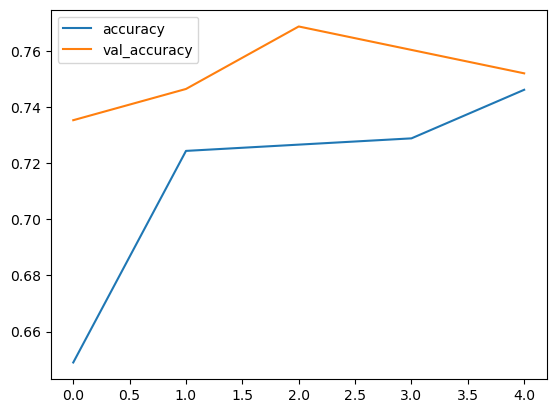

In [91]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

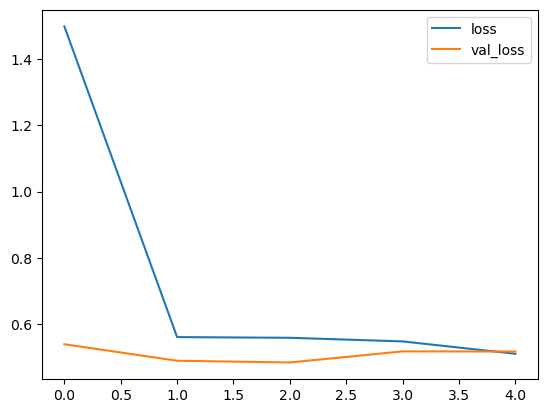

In [92]:
metrics[['loss','val_loss']].plot()

In [93]:
model.evaluate(test_img_gen)

23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7954 - loss: 0.4496


[0.5182119607925415, 0.7604456543922424]

In [94]:
model.metrics_names

['loss', 'compile_metrics']

In [95]:
test_pred = model.predict(test_img_gen)

23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


In [96]:
test_pred = test_pred >0.5

In [97]:
from sklearn.metrics import classification_report , confusion_matrix

In [98]:
print(classification_report(test_img_gen.classes,test_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       200
           1       0.77      0.68      0.72       159

    accuracy                           0.77       359
   macro avg       0.77      0.76      0.76       359
weighted avg       0.77      0.77      0.77       359



<Axes: >

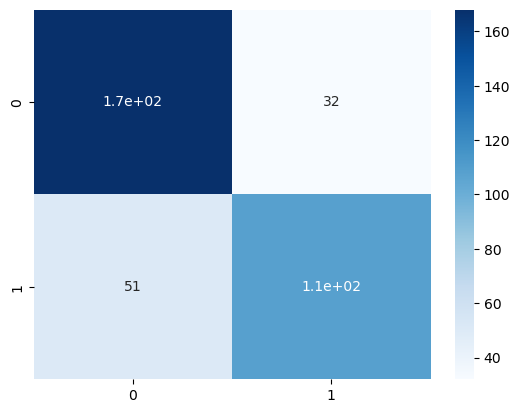

In [99]:
sns.heatmap(data=confusion_matrix(test_img_gen.classes,test_pred),annot = True , cmap='Blues')

In [100]:
os.listdir(test_data_dir +'\\Siirt_Pistachio'+'\\siirt 651.jpg')[69]

'siirt 651.jpg'

In [103]:
new=image.load_img(test_data_dir +'\\Siirt_Pistachio'+'\\siirt 651.jpg')

In [104]:
new = image.img_to_array(new)

In [105]:
new.shape

(600, 600, 3)

In [106]:
new=new.reshape(1,600,600,3)

In [108]:
model.predict(new) >0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[ True]])

In [109]:
test_img_gen.class_indices

{'Kirmizi_Pistachio': 0, 'Siirt_Pistachio': 1}

In [110]:
model.save('pistachio_model.keras')